In [50]:
#basic import
import pandas as pd
import numpy as np

#import library for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#read the data
snsdata=pd.read_csv(r"E:\uc files\snscsv.csv")

In [3]:
snsdata.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [52]:
#checking for null values
snsdata.isnull().sum()[snsdata.isnull().sum()>0]

gender    2724
age       5086
dtype: int64

In [5]:
snsdata.shape

(30000, 40)

In [6]:
#filling null values
snsdata.gender.fillna("F", inplace=True)

snsdata.age.fillna(snsdata.age.mean(),inplace=True)

In [8]:
#Converting categorical variable into numerical
snsdata.gender.replace({"F":1,"M":0},inplace=True)

In [9]:
#checking data types
snsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  int64  
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [10]:
#Model building on Kmeans
from sklearn.cluster import KMeans

kmeans_sns=KMeans(n_clusters=5)

kmeans_sns.fit(snsdata)

In [40]:
kmeans_sns.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [27]:
uni_cluster=set(kmeans_sns.labels_)
uni_cluster

{0, 1, 2}

In [28]:
len(kmeans_sns.labels_)

30000

In [53]:
#checking centroid
kmeans_sns.cluster_centers_

array([[2.00762254e+03, 8.67155291e-01, 1.79109902e+01, 7.07171324e+01,
        3.30279432e-01, 2.84928997e-01, 2.71873568e-01, 2.34997710e-01,
        1.78424187e-01, 1.54603756e-01, 1.39486945e-01, 1.28034814e-01,
        9.18460834e-02, 1.51626202e-01, 3.99221255e-01, 1.81859826e-01,
        1.59642694e-01, 1.49564819e-01, 1.13376088e-01, 5.02061383e-01,
        3.13330279e-01, 4.39761796e-02, 7.78973889e-01, 2.75080165e-01,
        5.61154375e-01, 3.38066880e-01, 1.46816308e-01, 2.40494732e-02,
        4.54420522e-01, 1.28721942e-01, 1.08108108e-01, 3.21346770e-01,
        4.46862116e-01, 1.71323866e-01, 9.52817224e-02, 7.69583142e-02,
        1.73614292e-01, 1.22308749e-01, 9.04718278e-02, 5.81768209e-02],
       [2.00743789e+03, 8.07346033e-01, 1.81020797e+01, 6.14959551e+00,
        2.25013048e-01, 2.30167015e-01, 1.93371608e-01, 1.21216075e-01,
        1.10581942e-01, 1.15996868e-01, 8.65735908e-02, 9.17927975e-02,
        8.13543841e-02, 1.27022443e-01, 2.74465031e-01, 2.07006

In [54]:
pd.DataFrame(kmeans_sns.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2007.622538,0.867155,17.910990,70.717132,0.330279,0.284929,0.271874,0.234998,0.178424,0.154604,...,0.108108,0.321347,0.446862,0.171324,0.095282,0.076958,0.173614,0.122309,0.090472,0.058177
1,2007.437891,0.807346,18.102080,6.149596,0.225013,0.230167,0.193372,0.121216,0.110582,0.115997,...,0.080376,0.220968,0.298408,0.134916,0.055258,0.040123,0.178954,0.100992,0.083964,0.064001
2,2007.684932,0.910959,17.837679,261.164384,0.328767,0.287671,0.287671,0.212329,0.219178,0.219178,...,0.130137,0.287671,0.513699,0.212329,0.130137,0.157534,0.205479,0.136986,0.136986,0.061644
3,2007.517261,0.825159,17.886511,34.350352,0.291699,0.268238,0.245783,0.179421,0.171713,0.152497,...,0.120880,0.264663,0.378170,0.157413,0.072282,0.049827,0.194057,0.128924,0.088482,0.056865
4,2007.694789,0.908189,17.736947,129.670802,0.388751,0.292804,0.239868,0.260546,0.207610,0.150538,...,0.134822,0.430108,0.500414,0.164599,0.138131,0.095120,0.210918,0.141439,0.119934,0.049628


In [30]:
#ssd value   ignore -ve
#ssd indicating -ve because software is indicatingc it as a error
#values may not be exactly same for all but it would be almost same
kmeans_sns.score(snsdata)

-11298651.299693504

In [31]:
#finding value of ssd for each cluster
ssd=[]

for k in range(1,11):
    kmeans_sns=KMeans(n_clusters=k)
    kmeans_sns.fit(snsdata)
    score=np.round(np.abs(kmeans_sns.score(snsdata)))
    ssd.append(score)

In [32]:
ssd

[42274975.0,
 18611355.0,
 11298600.0,
 8110500.0,
 6330443.0,
 5266180.0,
 3992816.0,
 3112030.0,
 2565680.0,
 2218773.0]

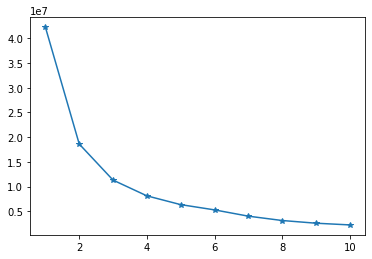

In [35]:
#Elbw plot for finding k value
cluster_value=list(range(1,11))
plt.plot(cluster_value,ssd,marker="*")

In [55]:
#another way of finding k 
for r in range (0,len(ssd)-1):
    value=(ssd[r]-ssd[r+1])*100/ssd[r]
    print(value)

55.97547958337054
39.29190002554892
28.21677021931921
21.947561802601566
16.81182501761725
24.180031825725667
22.05926844612925
17.556064690893084
13.52105484705809


In [41]:
#creating dataframe of centroids
centroids=pd.DataFrame(kmeans_sns.cluster_centers_)
centroids

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2007.622538,0.867155,17.910990,70.717132,0.330279,0.284929,0.271874,0.234998,0.178424,0.154604,...,0.108108,0.321347,0.446862,0.171324,0.095282,0.076958,0.173614,0.122309,0.090472,0.058177
1,2007.437891,0.807346,18.102080,6.149596,0.225013,0.230167,0.193372,0.121216,0.110582,0.115997,...,0.080376,0.220968,0.298408,0.134916,0.055258,0.040123,0.178954,0.100992,0.083964,0.064001
2,2007.684932,0.910959,17.837679,261.164384,0.328767,0.287671,0.287671,0.212329,0.219178,0.219178,...,0.130137,0.287671,0.513699,0.212329,0.130137,0.157534,0.205479,0.136986,0.136986,0.061644
3,2007.517261,0.825159,17.886511,34.350352,0.291699,0.268238,0.245783,0.179421,0.171713,0.152497,...,0.120880,0.264663,0.378170,0.157413,0.072282,0.049827,0.194057,0.128924,0.088482,0.056865
4,2007.694789,0.908189,17.736947,129.670802,0.388751,0.292804,0.239868,0.260546,0.207610,0.150538,...,0.134822,0.430108,0.500414,0.164599,0.138131,0.095120,0.210918,0.141439,0.119934,0.049628


In [56]:
#assigning column names to each centroids
centroids.columns=snsdata.columns
centroids

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.622538,0.867155,17.910990,70.717132,0.330279,0.284929,0.271874,0.234998,0.178424,0.154604,...,0.108108,0.321347,0.446862,0.171324,0.095282,0.076958,0.173614,0.122309,0.090472,0.058177
1,2007.437891,0.807346,18.102080,6.149596,0.225013,0.230167,0.193372,0.121216,0.110582,0.115997,...,0.080376,0.220968,0.298408,0.134916,0.055258,0.040123,0.178954,0.100992,0.083964,0.064001
2,2007.684932,0.910959,17.837679,261.164384,0.328767,0.287671,0.287671,0.212329,0.219178,0.219178,...,0.130137,0.287671,0.513699,0.212329,0.130137,0.157534,0.205479,0.136986,0.136986,0.061644
3,2007.517261,0.825159,17.886511,34.350352,0.291699,0.268238,0.245783,0.179421,0.171713,0.152497,...,0.120880,0.264663,0.378170,0.157413,0.072282,0.049827,0.194057,0.128924,0.088482,0.056865
4,2007.694789,0.908189,17.736947,129.670802,0.388751,0.292804,0.239868,0.260546,0.207610,0.150538,...,0.134822,0.430108,0.500414,0.164599,0.138131,0.095120,0.210918,0.141439,0.119934,0.049628


In [44]:
#assigning cluster number to each record
snsdata["label"]=kmeans_sns.labels_
snsdata.head(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
0,2006,0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,1,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2006,0,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,1,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,1,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


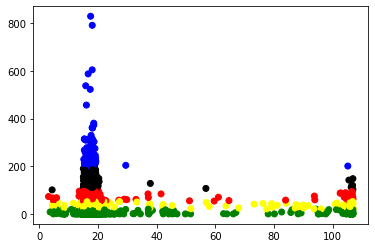

In [49]:
#getting insight from data
colormap=np.array(["red","green","blue","yellow","black"])
plt.scatter(snsdata.age,snsdata.friends,c=colormap[kmeans_sns.labels_])